In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv("loan_data.csv")
df.head(2)

,race,gender,date,zip,income,type,term,interest,principal,approved,adj_bls_2,id
0,hispanic/latino,male,2016-01-01,60623.0,72230.0,home,180,3.389672,508761,False,0.34,AP20161-0-2
1,other,male,2013-03-01,60625.0,18543.0,home,360,0.277318,119738,False,0.14,AP20133-1-23


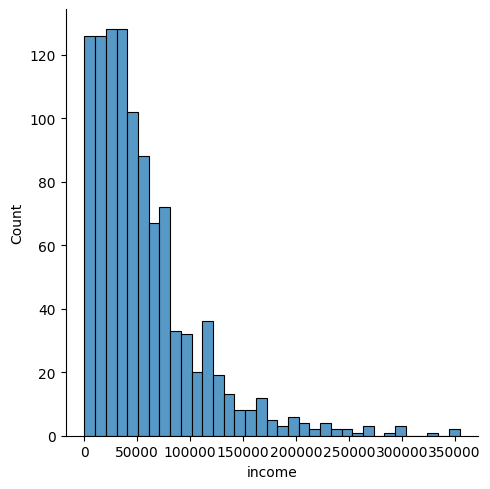

In [3]:
sns.displot(x="income",data=df)
plt.show()

In [5]:
q1=df["income"].quantile(0.25)
q3=df["income"].quantile(0.75)
iqr=q3-q1

In [6]:
min_r=q1 - (1.5*iqr)
max_r=q3 + (1.5*iqr)

In [7]:
min_r, max_r

(np.float64(-57510.5), np.float64(153989.5))

In [8]:
df = df[df["income"] <= max_r]

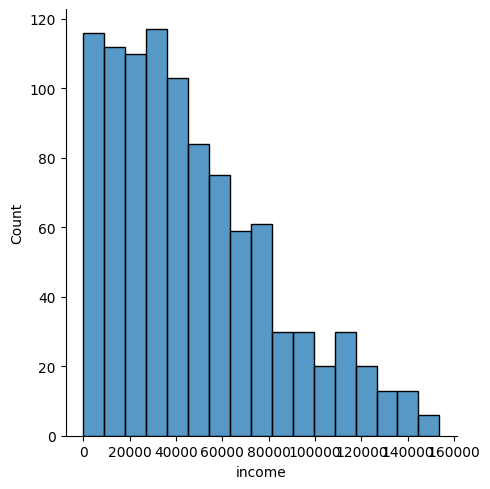

In [9]:
sns.displot(x="income",data=df)
plt.show()

In [10]:
from sklearn.preprocessing import FunctionTransformer

In [12]:
ft=FunctionTransformer(func=np.log1p)
ft.fit(df[["income"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [14]:
df["income_tf"]=ft.transform(df[["income"]])

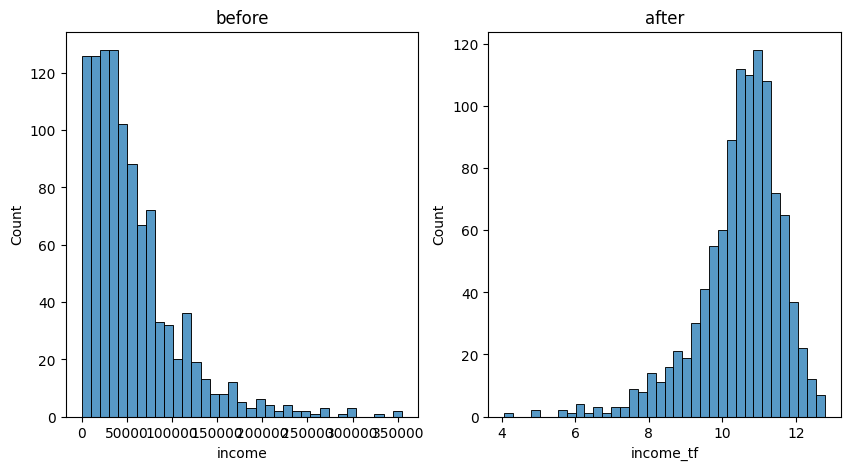

In [20]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x="income",data=df)
plt.title("before")

plt.subplot(1,2,2)
sns.histplot(x="income_tf",data=df)
plt.title("after")

plt.show()